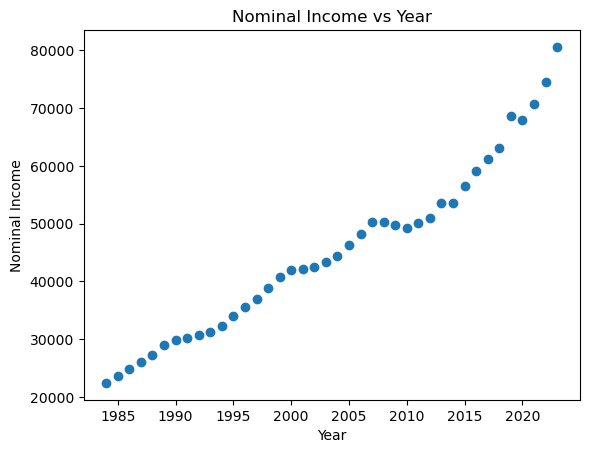

In [31]:
Dir_Main = "/Users/seanlin/Desktop/Python for AAE 625/Class 625/AAE625_25/Week_1"
# Import the MEHOINUSA646N.csv in the Dir_Main:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
df_income = pd.read_csv(Dir_Main + "/MEHOINUSA646N.csv")
# Change column names: observation_date: Date, MEHOINUSA646N: Nominal_income
df_income.columns = ['Date', 'Nominal_income']
# Change the Date to datetime format
df_income['Date'] = pd.to_datetime(df_income['Date'])
df_income['Year'] = df_income['Date'].dt.year
# Create scatter plot of the data
plt.scatter(df_income['Year'], df_income['Nominal_income'])
plt.xlabel('Year')
plt.ylabel('Nominal Income')
plt.title('Nominal Income vs Year')
plt.show()


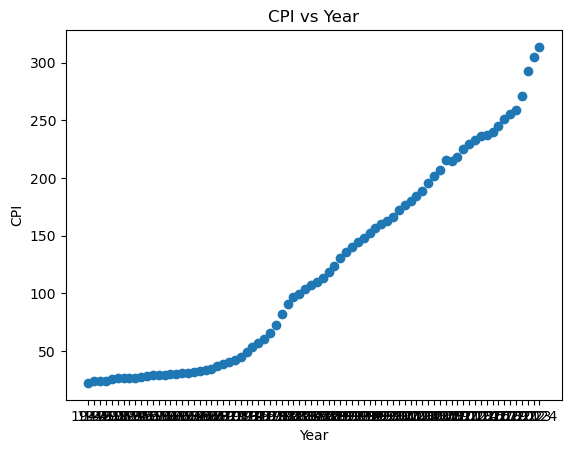

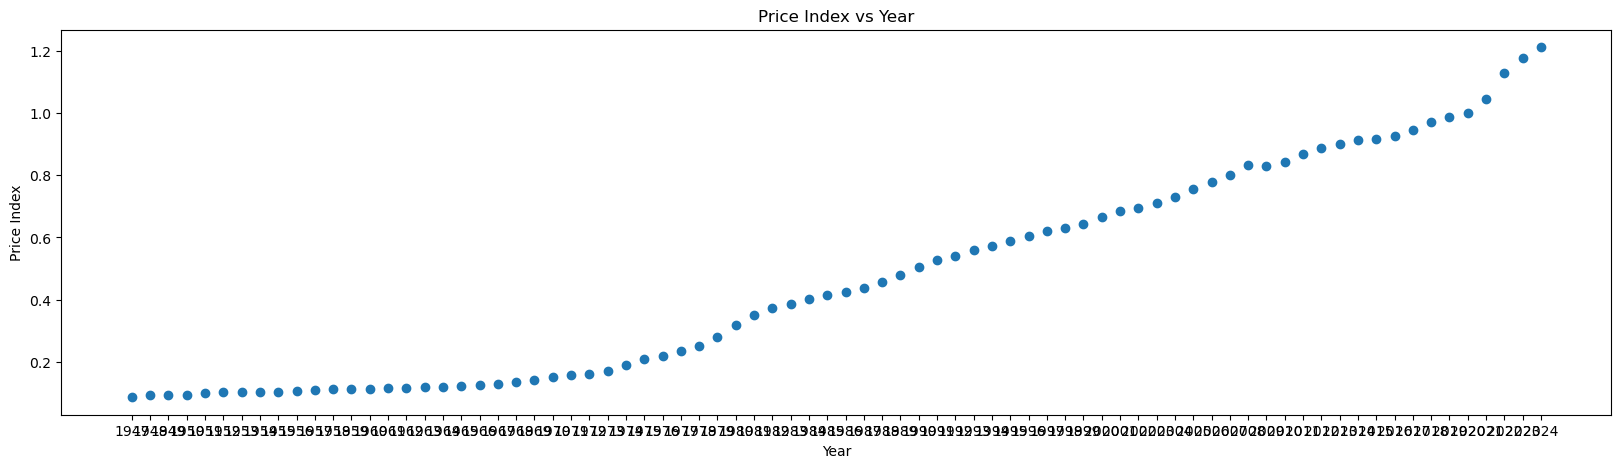

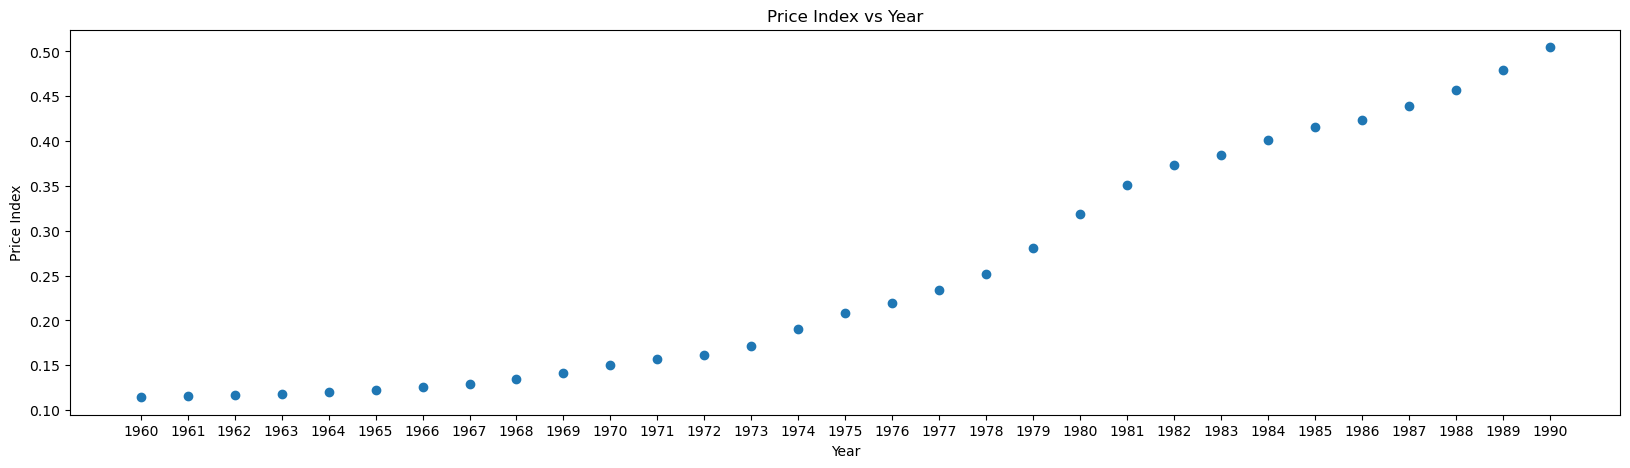

In [32]:
# cpi data saved in the Dir_Main folder, named as cpi_annual.csv
df_cpi = pd.read_csv(Dir_Main + "/cpi_annual.csv")
# Change column names: observation_date: Date, cpi: CPI
df_cpi.columns = ['Date', 'CPI']
df_cpi.head()
df_cpi['Year'] = df_cpi['Date'].str[:4]

# Create a scatter plot of the data
plt.scatter(df_cpi['Year'], df_cpi['CPI'])
plt.xlabel('Year')
plt.ylabel('CPI')
plt.title('CPI vs Year')
plt.show()

# Create the 'CPI_base2020' column in df_cpi
# the value of CPI_base2020 is the CPI value in 2020
CPI_base2020 = df_cpi.loc[df_cpi['Year'] == '2020', 'CPI'].values[0]

# Create the 'PriceIndex' column in df_cpi
df_cpi['PriceIndex'] = df_cpi['CPI'] / CPI_base2020
df_cpi.head()

# Change the size of the plot. It should be wider
plt.figure(figsize=(20, 5))
df_cpi_recent = df_cpi[df_cpi['Year'] >= '1970']
plt.scatter(df_cpi['Year'], df_cpi['PriceIndex'])
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.title('Price Index vs Year')
plt.show()

plt.figure(figsize=(20, 5))
df_cpi_60_90 = df_cpi[(df_cpi['Year'] >= '1960') & (df_cpi['Year'] <= '1990')]
plt.scatter(df_cpi_60_90['Year'], df_cpi_60_90['PriceIndex'])
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.title('Price Index vs Year')
plt.show()


In [33]:
df_cpi

,Date,CPI,Year,PriceIndex
0,1947-01-01,22.332,1947,0.086275
1,1948-01-01,24.045,1948,0.092893
2,1949-01-01,23.809,1949,0.091981
3,1950-01-01,24.063,1950,0.092963
4,1951-01-01,25.973,1951,0.100342
...,...,...,...,...
73,2020-01-01,258.846,2020,1.000000
74,2021-01-01,270.966,2021,1.046823
75,2022-01-01,292.621,2022,1.130483
76,2023-01-01,304.701,2023,1.177152


In [34]:
# Ensure the 'Year' in df_income and df_cpi are integers
df_income['Year'] = df_income['Year'].astype(int)
df_cpi['Year'] = df_cpi['Year'].astype(int)
print(df_income.head())
# Merge df_income and df_cpi
df_merge = pd.merge(df_income, df_cpi, on='Year', how='inner')
df_merge['Real_income'] = df_merge['Nominal_income'] / df_merge['PriceIndex']
df_merge.tail()


        Date  Nominal_income  Year
0 1984-01-01           22420  1984
1 1985-01-01           23620  1985
2 1986-01-01           24900  1986
3 1987-01-01           26060  1987
4 1988-01-01           27230  1988


,Date_x,Nominal_income,Year,Date_y,CPI,PriceIndex,Real_income
35,2019-01-01,68700,2019,2019-01-01,255.653,0.987664,69558.034523
36,2020-01-01,68010,2020,2020-01-01,258.846,1.000000,68010.000000
37,2021-01-01,70780,2021,2021-01-01,270.966,1.046823,67614.091362
38,2022-01-01,74580,2022,2022-01-01,292.621,1.130483,65971.802024
39,2023-01-01,80610,2023,2023-01-01,304.701,1.177152,68478.856518


In [35]:
df_merge.tail()

,Date_x,Nominal_income,Year,Date_y,CPI,PriceIndex,Real_income
35,2019-01-01,68700,2019,2019-01-01,255.653,0.987664,69558.034523
36,2020-01-01,68010,2020,2020-01-01,258.846,1.000000,68010.000000
37,2021-01-01,70780,2021,2021-01-01,270.966,1.046823,67614.091362
38,2022-01-01,74580,2022,2022-01-01,292.621,1.130483,65971.802024
39,2023-01-01,80610,2023,2023-01-01,304.701,1.177152,68478.856518


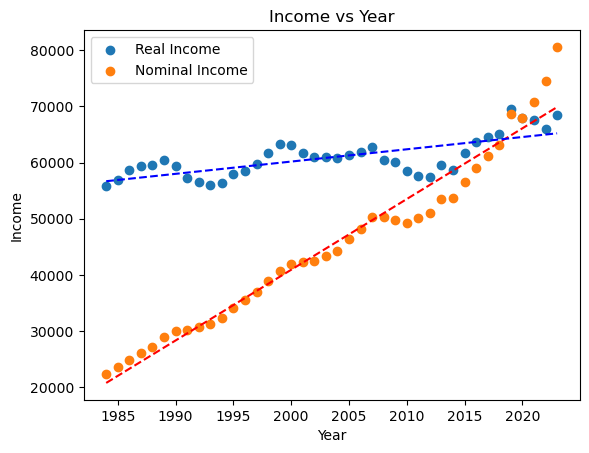

In [39]:
# Create a scatter plot of the real income and nominal income; the x-axis is the year and the y-axis is the income
plt.scatter(df_merge['Year'], df_merge['Real_income'], label='Real Income')
plt.scatter(df_merge['Year'], df_merge['Nominal_income'], label='Nominal Income')
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Income vs Year')
plt.legend()
# plt.show()

# Add the trendline:
# Nominal Income
# add the trend lines in the same figure

z = np.polyfit(df_merge['Year'], df_merge['Nominal_income'], 1)
p = np.poly1d(z)
plt.plot(df_merge['Year'], p(df_merge['Year']), "r--", label='Nominal_income_trendline')

# Real Income
z = np.polyfit(df_merge['Year'], df_merge['Real_income'], 1)
p = np.poly1d(z)
plt.plot(df_merge['Year'], p(df_merge['Year']), "b--", label='Real_income_trendline')

plt.show()


In [40]:
# Perform the polynomial fit for the real income
z = np.polyfit(df_merge['Year'], df_merge['Real_income'], 1)

# Extract the slope and intercept
slope = z[0]
intercept = z[1]

# Print the slope and intercept
print('Slope:', slope)
print('Intercept:', intercept)

Slope: 218.74084917271992
Intercept: -377296.87406457646


In [41]:
# Perform the polynomial fit for the nominal income
z = np.polyfit(df_merge['Year'], df_merge['Nominal_income'], 1)

# Extract the slope and intercept
slope = z[0]
intercept = z[1]

# Print the slope and intercept
print('Slope:', slope)
print('Intercept:', intercept)

Slope: 1260.1632270168764
Intercept: -2479417.0253283116
